# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests
import tweepy
import json

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read in the file into a DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Display the first few records of the DataFrame
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Use the get method to request for the data from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# Save to a file
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [6]:
# Read file into a DataFrame and view first few records
df_predictions = pd.read_csv('image-predictions.tsv', sep="\t")
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# Using tweetpy create an API object to gather Tweeter data
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
# Get Tweet IDs from the archive DataFrame
tweet_ids = df_archive.tweet_id.values

In [9]:
# Using the API Object to get tweets from Twitter API
#with open('tweet_json.txt', 'w') as file:
#    for tweet_id in tweet_ids:
#        try:
#            tweet_json = api.get_status(tweet_id, tweet_mood='extended')
        
#            json_data = json.dumps(tweet_json._json)
#           file.write(json_data)
#            file.write('\n')
#        except:
#            pass

In [10]:
# Create a list that will be converted to DataFrame
df_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count
                       })
df_api = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])

In [11]:
# Display the first few records of the DataFrame
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6996,33771
1,892177421306343426,5297,29295
2,891815181378084864,3476,22029
3,891689557279858688,7210,36864
4,891327558926688256,7750,35249


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing archive DataFrame for quality issues

In [12]:
# View the dimensionality of the DataFrame
df_archive.shape

(2356, 17)

In [13]:
# Get the first few rows of the DataFrame
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# Get concise summary of DataFrame
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> From the summary report, there are errorneous data type (`tweet_id`, `timestamp`, `retweeted_status_timestamp`), retweeted records, missing expanded url (no images) records, x. These will be documented.

In [15]:
# Investigating further for null records in the `expanded_urls` column. 
# These are tweets with no images.
sum(df_archive['expanded_urls'].isnull())

59

> There are tweet with no images.

In [16]:
# Since expanded_urls are urls of the tweet images, having more than one record would mean duplicate records
# Checking for duplicate records using the expanded_urls column
df_archive[df_archive['expanded_urls'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


> Investigating further to confirm for duplicate records in the `expanded_urls` column

In [17]:
# View all the content of the expanded url column for a particular tweet_id (case 1)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 667182792070062081]['expanded_urls'])

2286    https://twitter.com/dog_rates/status/667182792070062081/photo/1
Name: expanded_urls, dtype: object


In [18]:
# Conditionally select the record associated with this expanded url
df_archive[df_archive.expanded_urls == 'https://twitter.com/dog_rates/status/667182792070062081/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None


In [19]:
# View all the content of the expanded url column for a particular tweet_id (case 2)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 839549326359670784]['expanded_urls'])

280    https://twitter.com/dog_rates/status/839549326359670784/photo/1
Name: expanded_urls, dtype: object


In [20]:
# Conditionally select the record associated with this expanded url
df_archive[df_archive.expanded_urls == 'https://twitter.com/dog_rates/status/839549326359670784/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
171,858860390427611136,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Winston. He knows he's a l...,8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None


In [21]:
# View all the content of the expanded url column for a particular tweet_id (case 3)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 873213775632977920]['expanded_urls'])

98    https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1
Name: expanded_urls, dtype: object


In [22]:
# Conditionally select the record associated with this expanded url
url = 'https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1'
df_archive[df_archive.expanded_urls == url]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


> From the three further investigations above, we can see that these records are the same but one is actually a retweet of the other. So removing the retweet would solve this duplicate issue. This also confirm that there are retweets.

In [23]:
# Selecting a random sample of records
# Horning into the last 5 columns only
df_archive.iloc[:, -5:].sample(5)

,name,doggo,floofer,pupper,puppo
874,Bonaparte,None,None,None,None
1459,None,None,None,None,None
427,None,None,None,None,None
1293,None,None,None,None,None
54,Gary,None,None,None,None


> From the above, we see misrepresentation of missing values in the (dog name and dog stages) columns as None. There are also dog names with single letters and lowercase letters.

In [24]:
# Futher investigation of the name column.
# Select names that are all lowercase letters
lc_names = df_archive[df_archive.name.str.islower()]
lc_names.loc[:, ['tweet_id','text','name']].sample(5)

,tweet_id,text,name
2019,672125275208069120,This is just impressive I have nothing else to...,just
2161,669564461267722241,This is a Coriander Baton Rouge named Alfredo....,a
1994,672604026190569472,This is a baby Rand Paul. Curls for days. 11/1...,a
335,832645525019123713,There's going to be a dog terminal at JFK Airp...,not
1737,679530280114372609,Guys this really needs to stop. We've been ove...,a


> It seem names that are lowercase letters are errors. Since the project details state that the name column was extracted from the text column, then investigsting more on the name column by comparing corresponding text column would be a wise course.

In [25]:
# View all the content of the text column for a particular tweet_id (case 1)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 668587383441514497]['text'])

2212    Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
Name: text, dtype: object


In [26]:
# Check the value in the name column for the same tweet_id
df_archive[df_archive['tweet_id'] == 668587383441514497]['name']

2212    the
Name: name, dtype: object

In [27]:
# View all the content of the text column for a particular tweet_id (case 2)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 666411507551481857]['text'])

2326    This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t
Name: text, dtype: object


In [28]:
# Check the value in the name column for the same tweet_id
df_archive[df_archive['tweet_id'] == 666411507551481857]['name']

2326    quite
Name: name, dtype: object

In [29]:
# View all the content of the text column for a particular tweet_id (case 3)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 666050758794694657]['text'])

2350    This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
Name: text, dtype: object


In [30]:
# Check the value in the name column for the same tweet_id
df_archive[df_archive['tweet_id'] == 666050758794694657]['name']

2350    a
Name: name, dtype: object

> From the three further investigation, we can see that the algorithm used to extract the names made few mistakes. It seems after a few checks that all the lowercase names are erroneous.

In [31]:
# View all the content of the text column for a particular tweet_id (case 3)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 699072405256409088]['text'])

1408    ERMAHGERD 12/10 please enjoy https://t.co/7WrAWKdBac
Name: text, dtype: object


In [32]:
# View all the content of the text column for a particular tweet_id (case 3)
with pd.option_context("display.max_colwidth", -1):
    print(df_archive[df_archive['tweet_id'] == 838952994649550848]['text'])

283    SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN https://t.co/ngAxYLVYHP
Name: text, dtype: object


> There are some records with uppercase values in the text column

In [33]:
# Investigating for records beyond August 1st, 2017
len(df_archive[df_archive['timestamp'] > '2017-08-01'])

2

> There are records beyound August 1st, 2017

### Accessing predictions DataFrame for quality issues

In [34]:
# View the dimensionality of the DataFrame
df_predictions.shape

(2075, 12)

In [35]:
# Get the first few rows of the DataFrame
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
# Get concise summary of the DataFrame
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> The tweet id column has int64 data type while it will never be used to perform any calculation, thus incorrect data type issue

In [37]:
# Get descriptive statistics of the DataFrame
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> The maximum value and the minimum value for the `img_num` column seems to be very close. Let's investigate further into that column

In [38]:
# Count unique records
df_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [39]:
# Confirm the unique records
df_predictions.img_num.unique()

array([1, 4, 2, 3])

> There are only a limited number of values in the `img_num` column, thus a more fitting data type should be choosen.

In [40]:
# Checking for duplicate records
df_predictions[df_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [41]:
# Investigating deeper for duplicates
# Conditionally select records for one of the jpg_url
df_predictions[df_predictions['jpg_url'] == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [42]:
# Conditionally select records for another jpg_url
df_predictions[df_predictions['jpg_url'] == 'https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


In [43]:
# Conditionally select records for another jpg_url
df_predictions[df_predictions['jpg_url'] == 'https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True


> We can confirm that these are truly duplicate records. They have the exact same information.

In [44]:
# View a random sample of DataFrame
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
121,668204964695683073,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,1,Labrador_retriever,0.655180,True,golden_retriever,0.107884,True,Chesapeake_Bay_retriever,0.065835,True
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True
187,669367896104181761,https://pbs.twimg.com/media/CUoSjTnWwAANNak.jpg,1,basset,0.749394,True,beagle,0.133579,True,Welsh_springer_spaniel,0.030198,True
1729,820749716845686786,https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg,2,golden_retriever,0.838012,True,Pekinese,0.056733,True,Labrador_retriever,0.023944,True


> The values in columns `p1`, `p2`, `p3` are inconsitent and there are inapproprate use of underbars.

### Accessing api DataFrame for quality issues

In [45]:
# Check the dimensionality of the DataFrame
df_api.shape

(873, 3)

In [46]:
# Get the first few rows of the DataFrame
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6996,33771
1,892177421306343426,5297,29295
2,891815181378084864,3476,22029
3,891689557279858688,7210,36864
4,891327558926688256,7750,35249


In [47]:
# Get concise summary of the DataFrame
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 3 columns):
tweet_id          873 non-null int64
retweet_count     873 non-null int64
favorite_count    873 non-null int64
dtypes: int64(3)
memory usage: 20.5 KB


In [48]:
# Get descriptive statistics of the DataFrame
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,8.730000e+02,873.000000,873.000000
mean,8.201381e+17,4346.108820,12978.088202
std,3.687956e+16,4892.892371,13592.427774
min,7.588287e+17,1.000000,0.000000
25%,7.895992e+17,1804.000000,4995.000000
50%,8.185365e+17,2968.000000,9906.000000
75%,8.482121e+17,5089.000000,18250.000000
max,8.924206e+17,51603.000000,123901.000000


> From the two reports above, we see that `tweet_id` columns is an int64 data type but it will never be used to perform any calculation. Thus, it should be considered as incorrect data type.

### Asessing Archive DataFrame for tidyness issues

In [49]:
# Display the first few records
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> Looking at the `doggo`, `floofer`, `pupper`, `puppo` columns, we see that they are actually values not variable names. So we will have a new column that will take all four of them as values.

### Assessing predictions DataFrame for tidyness issues

In [50]:
# Display the first few records
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> This table after being cleaned has no tidyness issues. It meets all the three requirements for a tidy data. 
    * Each variable forms a column
    * Each observation forms a row
    * Each type of observational unit forms a table

### Assessing API DataFrame for tidyness issues

In [51]:
# Display first few records
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6996,33771
1,892177421306343426,5297,29295
2,891815181378084864,3476,22029
3,891689557279858688,7210,36864
4,891327558926688256,7750,35249


> The DataFrame does not form an observational unit on its own while it satisfies the other two requirements. It would make sense for it to be joined with the archive table.

### Quality issues

####  ~ archive DataFrame
1. incorrect data type for `tweet_id`, `timestamp`, `retweet_status_timestamp` columns

2. tweet records with no images

3. some records are retweets

4. null values represnted as `None` in dog name and dog stage columns

5. dog names starting with small letters are erroneous

6. some values in the text column are uppercase

7. records beyond August 1st, 2017

#### ~ predictions DataFrame
8. incorrect data type for `tweet_id`, `img_num` columns

9. duplicate `jpg_url` records

10. inappropriate use of underbars and inconsistent cases in p1, p2, p3 columns

#### ~ api DataFrame
11. incorrect data type for `tweet_id` column

### Tidiness issues
1. the columns `doggo`, `floofer`, `pupper`, `puppo` are values not variable names

2. data from the Tweeter API is the same observational unit with the archive data frame

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [52]:
# Make copies of original pieces of data
archive_copy = df_archive.copy()
predictions_copy = df_predictions.copy()
api_copy = df_api.copy()

## Quality Issues

Here, all the 11 quality issues found in the above documentation will be cleaned

### Issue #1: 

Incorrect data type for `tweet_id`, `timestamp` and `retweet_status_timestamp` columns in archive DataFrame

#### Define
- Convert `tweet_id` column to object data type using `astype` method.
- Convert `timestamp` and `retweet_status_timestamp` columns to datetime data type using pandas `to_datetime` method.

#### Code

In [53]:
# Convert data type to object
archive_copy.tweet_id = archive_copy['tweet_id'].astype(str)

In [54]:
# Convert data type to datetime
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)
archive_copy.retweeted_status_timestamp = pd.to_datetime(archive_copy.retweeted_status_timestamp)

#### Test

In [55]:
# Get concise summary report
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

### Issue #2:

Tweet records with no images

#### Define:
- Select records in the `expanded_urls` columns with `NaN` value

#### Code

In [56]:
# Conditionally select records
archive_copy = archive_copy[archive_copy['expanded_urls'].notnull()]

#### Test

In [57]:
# Check for isnull records on the expanded url column
sum(archive_copy.expanded_urls.isnull())

0

In [58]:
# Check the dimension of the dataframe
archive_copy.shape

(2297, 17)

### Issue #3:

Some records are retweets

#### Define
- Select all records with `NaN` value in the `tweeted_status_user_id` column

#### Code

In [59]:
# Select only records that have null values
archive_copy = archive_copy[archive_copy['retweeted_status_id'].isnull()]

#### Test

In [60]:
sum(archive_copy.retweeted_status_id.notnull())

0

In [61]:
# Check the dimension of the dataframe
archive_copy.shape

(2117, 17)

### Issue #4

Null values represnted as None in dog name and dog stage columns

#### Define
- Replace all `None` values in the `name`, `doggo`, `floofer`, `pupper`, `puppo` columns with `NaN`

In [62]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns

#### Code

In [63]:
# Replace each column with correct value
archive_copy.name = archive_copy.name.replace('None', np.nan)
archive_copy.doggo = archive_copy.doggo.replace('None', np.nan)
archive_copy.floofer = archive_copy.floofer.replace('None', np.nan)
archive_copy.pupper = archive_copy.pupper.replace('None', np.nan)
archive_copy.puppo = archive_copy.puppo.replace('None', np.nan)

#### Test

In [64]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1495 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        232 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](2), f

In [65]:
# View a sample of the dataframe horning down into the last five columns
archive_copy.iloc[:, -5:].sample(5)

,name,doggo,floofer,pupper,puppo
1305,Clarkus,NaN,NaN,NaN,NaN
1317,NaN,NaN,NaN,NaN,NaN
1128,Stefan,NaN,NaN,NaN,NaN
2075,Colby,NaN,NaN,NaN,NaN
842,Rufus,NaN,NaN,NaN,NaN


In [66]:
# Select records with value None in name column
archive_copy[archive_copy['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [67]:
# Select records with value floofer in name column
archive_copy[archive_copy['floofer'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [68]:
# Select records with value None in puppo column
archive_copy[archive_copy['puppo'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5

Dog names starting with small letters are erroneous. So here, all lowercase names will be replaced with `NaN` because they were erroneiusly picked by the algorithm.

#### Define
- Replace all lowercase names with `NaN`

#### Code

In [69]:
# Replace all lowercase values in the name column with `NaN`
archive_copy.name = archive_copy.name.replace(r'\b[a-z]', np.nan, regex=True)

#### Test

In [70]:
# Display a random sample of values in the name column 
archive_copy[archive_copy.name.notnull()].sample(5)['name']

662      Misty
706     Dallas
1644     Tiger
1318    Oliver
700     Mattie
Name: name, dtype: object

In [71]:
# Select records with value 'a' in name column
archive_copy[archive_copy['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [72]:
# Select records with value 'the' in name column
archive_copy[archive_copy['name'] == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [73]:
# Get concise summary of dataframe
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1391 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        232 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](2), f

### Issue #6

Some values in the text column are uppercase.

#### Define
- Change the cases from uppercase to capitalize case.

#### Code

In [74]:
archive_copy.loc[:, ['tweet_id','text']].sample(5)

,tweet_id,text
2207,668627278264475648,This is Timofy. He's a pilot for Southwest. It...
1369,702332542343577600,This is Rudy. He's going to be a star. 13/10 t...
856,764259802650378240,This is Kota and her son Benedict. She doesn't...
1105,734912297295085568,This is Jax. He's a literal fluffball. Sneaky ...
1874,675135153782571009,This is Steven. He got locked outside. Damn it...


In [75]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '699072405256409088']['text'])

1408    ERMAHGERD 12/10 please enjoy https://t.co/7WrAWKdBac
Name: text, dtype: object


In [76]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '838952994649550848']['text'])

283    SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN https://t.co/ngAxYLVYHP
Name: text, dtype: object


In [77]:
# Change all values of the text column to capitalize case

# def capitalize_text(tweet):
#     if tweet['text'].str.extract(r'([A-Z])'):
#         return tweet['text'].str.capitalize()
#     else:
#         return tweet['text']
    
def cap_txt(tweet):
    return tweet['text'].capitalize()

archive_copy['text'] = archive_copy.apply(cap_txt, axis=1)

#### Test

In [78]:
archive_copy.loc[:, ['tweet_id','text']].sample(5)

,tweet_id,text
2314,666701168228331520,This is a golden buckminsterfullerene named jo...
1708,680798457301471234,Say hello to moofasa. he must be a powerful do...
1163,723673163800948736,This is ivar. she is a badass viking warrior. ...
647,793135492858580992,Your favorite squad is looking extra h*ckin sp...
1804,676946864479084545,This pups goal was to get all four feet as clo...


In [79]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '838952994649550848']['text'])

283    She misplaced her hooman 13/10 mistakes happen https://t.co/ngaxylvyhp
Name: text, dtype: object


In [80]:
archive_copy[archive_copy['tweet_id'] == '699072405256409088']['text']

1408    Ermahgerd 12/10 please enjoy https://t.co/7wra...
Name: text, dtype: object

### Issue #7

There are records beyond August 1st, 2017

#### Define
- records beyond August 1st, 2017

#### Code

In [81]:
# Select records that have timestap < August 1st, 2017
archive_copy = archive_copy[archive_copy['timestamp'] < '2017-08-01']

#### Test

In [82]:
# Select records beyond August 1st, 2017
len(archive_copy[archive_copy['timestamp'] > '2017-08-01'])

0

### Issue #8

Incorrect data type for `tweet_id`, `img_num` columns in the predictions DataFrame

#### Define
- Convert `tweet_id` column to object data type using `astype` method.
- Convert `img_num` column to category data type using pandas `astype` method.

#### Code

In [83]:
# Convert data type to object
predictions_copy.tweet_id = predictions_copy['tweet_id'].astype(str)

In [84]:
# Convert data type to category
predictions_copy.img_num = predictions_copy['img_num'].astype('category')

#### Test

In [85]:
# Get concise summary of the DataFrame
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


### Issue #9

Duplicate `jpg_url` records in the predictions DataFrame

#### Define
- Remove the duplicated records from the DataFrame using the `drop_duplicates` method

#### Code

In [86]:
# Remove rows that are duplicates using the `jpg_url` column
predictions_copy.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [87]:
# Checking for duplicate records
predictions_copy[predictions_copy.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [88]:
# Get concise summary of the DataFrame
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null category
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 149.3+ KB


### Issue #10

Inappropriate use of underbars and inconsistent cases in `p1`, `p2`, `p3` columns in predictions DataFrame

#### Define
- Change all values to lower case
- Replace all `_` with spaces

#### Code

In [89]:
# Change all values of the p1, p2, p3 columns to capitalize case
predictions_copy['p1'] = predictions_copy['p1'].str.lower()
predictions_copy['p2'] = predictions_copy['p2'].str.lower()
predictions_copy['p3'] = predictions_copy['p3'].str.lower()

In [90]:
# Replace all `_` with spaces
predictions_copy.p1 = predictions_copy.p1.str.replace('_', ' ')
predictions_copy.p2 = predictions_copy.p2.str.replace('_', ' ')
predictions_copy.p3 = predictions_copy.p3.str.replace('_', ' ')

#### Test

In [91]:
# Display random sample of dataframe
predictions_copy.loc[:, ['p1','p2','p3']].sample(5)

,p1,p2,p3
605,entlebucher,greater swiss mountain dog,appenzeller
424,ostrich,bearskin,swab
190,cocker spaniel,blenheim spaniel,toy poodle
1751,teddy,jigsaw puzzle,doormat
1825,border collie,collie,cardigan


### Issue #11

Incorrect data type for `tweet_id` column in api dataframe

#### Define
- Convert `tweet_id` column to object data type using `astype` method.

#### Code

In [92]:
# Convert data type to object
api_copy.tweet_id = api_copy['tweet_id'].astype(str)

#### Test

In [93]:
# Get concise summary of the DataFrame
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 3 columns):
tweet_id          873 non-null object
retweet_count     873 non-null int64
favorite_count    873 non-null int64
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


## Tidiness Issue

Here, all the tidiness issues documented above will be cleaned

### Issue #1

The columns `doggo`, `floofer`, `pupper`, `puppo` are are values not variable names

#### Define
- Unpivot the columns `doggo`, `floofer`, `pupper`, `puppo` into values of a new column `dog_stage` using the `melt` method

#### Code

In [94]:
# Get a list of all the column names except the four last columns
id_vars = list(archive_copy)[:-4]
id_vars

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name']

In [95]:
# Unpivot the dataframe to get all stages in a new column
archive_copy = archive_copy.melt(id_vars=id_vars, 
                                 value_vars=['doggo','floofer','pupper','puppo'], 
                                 var_name='stage_name', 
                                 value_name='stage')

#### Test

In [96]:
archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage_name,stage
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is archie. he is a rare norwegian pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,NaN
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is darla. she commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,NaN
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is franklin. he would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,NaN
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,doggo,NaN
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet jax. he enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,NaN
5,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,doggo,NaN
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is zoey. she doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,doggo,NaN
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is cassie. she is a college pup. studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is koda. he is a south australian decksha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,doggo,NaN
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is bruno. he is a service shark. only get...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,doggo,NaN


In [97]:
# View a sample of the dataframe
archive_copy.iloc[:, -6:].sample(5)

,expanded_urls,rating_numerator,rating_denominator,name,stage_name,stage
1312,https://twitter.com/dog_rates/status/689977555...,12,10,NaN,doggo,NaN
5412,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,pupper,NaN
6373,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,puppo,NaN
382,https://twitter.com/dog_rates/status/813217897...,13,10,Atlas,doggo,NaN
1661,https://twitter.com/dog_rates/status/674754018...,12,10,NaN,doggo,NaN


In [98]:
# Drop the variable name column
# archive_copy.drop('stage_name', axis=1, inplace=True)

In [99]:
# View a sample of the dataframe
archive_copy.loc[:, ['tweet_id','rating_numerator','rating_denominator','name','stage']].sample(5)

,tweet_id,rating_numerator,rating_denominator,name,stage
7729,685547936038666240,14,10,NaN,NaN
3516,684594889858887680,10,10,NaN,NaN
4377,857393404942143489,13,10,NaN,NaN
2632,789137962068021249,12,10,Bo,NaN
2099,666099513787052032,8,10,NaN,NaN


In [100]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '690649993829576704']['text'])

1300    This is hazel. she's a gymnast. training hard for rio. 11/10 focused af https://t.co/cneg2zbxhp
3415    This is hazel. she's a gymnast. training hard for rio. 11/10 focused af https://t.co/cneg2zbxhp
5530    This is hazel. she's a gymnast. training hard for rio. 11/10 focused af https://t.co/cneg2zbxhp
7645    This is hazel. she's a gymnast. training hard for rio. 11/10 focused af https://t.co/cneg2zbxhp
Name: text, dtype: object


In [101]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '690649993829576704']['stage'])

1300    NaN
3415    NaN
5530    NaN
7645    NaN
Name: stage, dtype: object


In [102]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '674318007229923329']['text'])

1681    This is lennon. he's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8xxpazv
3796    This is lennon. he's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8xxpazv
5911    This is lennon. he's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8xxpazv
8026    This is lennon. he's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8xxpazv
Name: text, dtype: object


In [103]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '674318007229923329']['stage'])

1681    NaN   
3796    NaN   
5911    pupper
8026    NaN   
Name: stage, dtype: object


In [104]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '821107785811234820']['text'])

336     Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8siwkdlrcl
2451    Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8siwkdlrcl
4566    Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8siwkdlrcl
6681    Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8siwkdlrcl
Name: text, dtype: object


In [105]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '821107785811234820']['stage'])

336     doggo
2451    NaN  
4566    NaN  
6681    NaN  
Name: stage, dtype: object


In [106]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '751583847268179968']['text'])

748     Please stop sending it pictures that don't even have a doggo or pupper in them. churlish af. 5/10 neat couch tho https://t.co/u2c9c7qsg8
2863    Please stop sending it pictures that don't even have a doggo or pupper in them. churlish af. 5/10 neat couch tho https://t.co/u2c9c7qsg8
4978    Please stop sending it pictures that don't even have a doggo or pupper in them. churlish af. 5/10 neat couch tho https://t.co/u2c9c7qsg8
7093    Please stop sending it pictures that don't even have a doggo or pupper in them. churlish af. 5/10 neat couch tho https://t.co/u2c9c7qsg8
Name: text, dtype: object


In [107]:
# View all the content of the text column for a particular tweet_id
with pd.option_context("display.max_colwidth", -1):
    print(archive_copy[archive_copy['tweet_id'] == '751583847268179968']['stage'])

748     doggo 
2863    NaN   
4978    pupper
7093    NaN   
Name: stage, dtype: object


In [108]:
# View the dimension of the dataframe
archive_copy.shape

(8460, 15)

In [109]:
# View the size of duplicates
archive_copy[archive_copy['tweet_id'].duplicated()].shape[0]

6345

### Issue #2

Data from the API dataframe is the same observational unit with the archive dataframe

#### Define
- Merge data from the Tweeter API datframe with the archive data frame

#### Code

In [110]:
# Merge two dataframes
archive_copy = pd.merge(archive_copy, api_copy, 
                       on=['tweet_id'], how='left')

#### Test

In [111]:
# Display first few records
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage_name,stage,retweet_count,favorite_count
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is archie. he is a rare norwegian pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,NaN,3476.0,22029.0
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is darla. she commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,NaN,7210.0,36864.0
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is franklin. he would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,NaN,7750.0,35249.0
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,doggo,NaN,2594.0,17777.0
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet jax. he enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,NaN,1658.0,10343.0


In [112]:
# Get a concise summary
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8460 entries, 0 to 8459
Data columns (total 17 columns):
tweet_id                      8460 non-null object
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8460 non-null datetime64[ns]
source                        8460 non-null object
text                          8460 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 8460 non-null object
rating_numerator              8460 non-null int64
rating_denominator            8460 non-null int64
name                          5556 non-null object
stage_name                    8460 non-null object
stage                         350 non-null object
retweet_count                 2768 non-null float64
favorite_count                2768 non-null float64
dtypes: datetime64[n

In [113]:
# Get summary statistics
archive_copy.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,9.200000e+01,9.200000e+01,0.0,0.0,8460.000000,8460.000000,2768.000000,2768.000000
mean,6.978112e+17,4.196984e+09,NaN,NaN,12.245390,10.501655,4213.128613,16195.257225
std,4.286923e+16,0.000000e+00,NaN,NaN,40.287192,7.107928,4758.171606,13409.434688
min,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,141.000000,819.000000
25%,6.717299e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,1862.750000,8040.000000
50%,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,2866.500000,12331.000000
75%,7.032559e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,4558.750000,20005.750000
max,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,51603.000000,123901.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [114]:
# Save the combined archive dataset
archive_copy.to_csv('twitter_archive_master.csv', index=False)

In [115]:
# Save the predictions dataset
predictions_copy.to_csv('predictions_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [116]:
archive_copy_master = archive_copy.loc[:, ['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name','stage_name','stage','retweet_count','favorite_count']]

In [117]:
archive_copy_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_name,stage,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is archie. he is a rare norwegian pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,NaN,3476.0,22029.0
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is darla. she commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,NaN,7210.0,36864.0
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is franklin. he would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,NaN,7750.0,35249.0
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,doggo,NaN,2594.0,17777.0
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet jax. he enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,NaN,1658.0,10343.0


In [118]:
archive_copy_master[['stage_name', 'stage', 'retweet_count']].groupby(['stage_name', 'stage']).count()

,,retweet_count
stage_name,stage,
doggo,doggo,59
floofer,floofer,4
pupper,pupper,47
puppo,puppo,18


In [119]:
archive_copy_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,8460.000000,8460.000000,2768.000000,2768.000000
mean,12.245390,10.501655,4213.128613,16195.257225
std,40.287192,7.107928,4758.171606,13409.434688
min,0.000000,2.000000,141.000000,819.000000
25%,10.000000,10.000000,1862.750000,8040.000000
50%,11.000000,10.000000,2866.500000,12331.000000
75%,12.000000,10.000000,4558.750000,20005.750000
max,1776.000000,170.000000,51603.000000,123901.000000


In [120]:
archive_copy_master.loc[:, ['stage','rating_numerator']].groupby(['stage']).max()

,rating_numerator
stage,
doggo,14
floofer,13
pupper,27
puppo,14


In [121]:
archive_copy_master[['stage_name', 'stage', 'favorite_count']].groupby(['stage_name', 'stage']).mean()

,,favorite_count
stage_name,stage,
doggo,doggo,15408.440678
floofer,floofer,18359.250000
pupper,pupper,15668.319149
puppo,puppo,25657.166667


### Insights:
1. Dogs in the doggo stage were retweeted the most.

2. The highest rating numerator was 27 and it was for a pupper stage dog

3. On the average, relative to each dog stage frequency, puppo stage dogs have more favorites

### Visualization

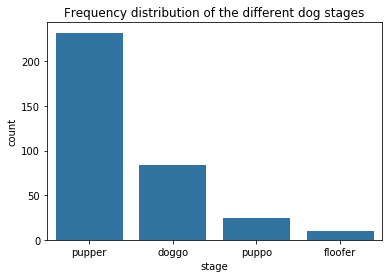

In [122]:
base_color = sb.color_palette()[0]
order = archive_copy_master['stage'].value_counts().index
sb.countplot(data=archive_copy_master, x='stage', color=base_color, order=order)
plt.title('Frequency distribution of the different dog stages');